In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk

In [2]:
path_git = "d:/Git_Proyects/Tesis/Base_Twitter/manual manual/Tweets_persona_clusterizado/"
macri = pd.read_csv(path_git+'Tweets_Macri_cluster_aug.csv')

C:\Users\Ale\AppData\Local\Temp\ipykernel_10648\3551172818.py:2: DtypeWarning: Columns (0,1,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  macri = pd.read_csv(path_git+'Tweets_Macri_cluster_aug.csv')


In [3]:
macri_clus = macri[macri['cluster'] == True].reset_index()
macri_else = macri[macri['cluster'] == False].reset_index()

In [4]:
macri_clus

,index,Unnamed: 0.1,Unnamed: 0,Tweets,Fecha,urls,urls_reales,medios,Tweets_sin_url,cluster
0,12655,12655,12655,@C5N @Gatosylvestre Macri debe estar mezclando...,Thu Aug 01 23:33:55 +0000 2019,0,0,False,@C5N @Gatosylvestre Macri debe estar mezclando...,True
1,20530,20530,20530,@marcos_1277 @France24_es Macri hizo obras. Ya...,Fri Aug 02 14:01:29 +0000 2019,0,0,False,@marcos_1277 @France24_es Macri hizo obras. Ya...,True
2,52056,52056,52056,"Ahora no se inunda más, después de 20 años, y ...",Sun Aug 04 04:07:38 +0000 2019,0,0,False,"Ahora no se inunda más, después de 2 años, y l...",True
3,64147,64147,64147,@carolina_moine @MarioSa35162080 @PiroLeti @Mo...,Sun Aug 04 23:42:32 +0000 2019,https://t.co/zq3t5fYUnx,http://gobierna.no,False,@carolina_moine @MarioSa35162080 @PiroLeti @Mo...,True
4,64472,64472,64472,Absolutamente falso. El Gobierno de Macri se n...,Sun Aug 04 23:58:14 +0000 2019,https://t.co/2EYq5kMr2b,https://twitter.com/eaplase/status/11581644459...,False,Absolutamente falso. El Gobierno de Macri se n...,True
...,...,...,...,...,...,...,...,...,...,...
1899,920968,920960,920960,@AlenK_B Obvio que no les importa. Sólo esgrim...,Sat Aug 31 22:26:31 +0000 2019,0,0,False,@AlenK_B Obvio que no les importa. Sólo esgrim...,True
1900,921782,921774,921774,"@Florenciarietto Si, eso dijo Churchill....mac...",Sat Aug 31 23:14:26 +0000 2019,0,0,False,"@Florenciarietto Si, eso dijo Churchill....mac...",True
1901,921820,921812,921812,"@hernanea Si, Arietto...eso dijo Churchill...m...",Sat Aug 31 23:16:27 +0000 2019,0,0,False,"@hernanea Si, Arietto...eso dijo Churchill...m...",True
1902,922388,922380,922380,@fachu0 Si todo está joya!!! Macri también nie...,Sat Aug 31 23:46:32 +0000 2019,0,0,False,@fachu Si todo está joya!!! Macri también nieg...,True


In [5]:
for i in (macri_clus['Tweets'][0:10]):
    print(i)


@C5N @Gatosylvestre Macri debe estar mezclando material para hacer otra calle o ruta,  hablando con Vidal de como se llena una heladera cuando no se inunda una calle y zapatillas blancas y como no tiene coherencia su discurso , no sé, me perdí.
@marcos_1277 @France24_es Macri hizo obras. Ya no se inundan
Ahora no se inunda más, después de 20 años, y lo hizo Macri. Viste? Y asaltaron todo lo q faltaba al rededor.... Sí y lo hizo Macri y también vi el Metrobus de Calchaquí, está muy lindo.
Bueno algún asado te clavas..y sí. Fijate, pensá bien a quien votar!
@carolina_moine @MarioSa35162080 @PiroLeti @MoraLicadeiros Es así caro. Parece q no https://t.co/zq3t5fYUnx se hace cargo de nada. Todo Es culpa de macri. Rutas sin señalización. Caen 2 gotas y se inunda el sur de  Tucumán.
Absolutamente falso. El Gobierno de Macri se niega a presentar el impacto hidráulico y ambiental, a pesar de exigirlo el Juez Federal de Mercedes. #SanAntonioDeAreco no se inunda más por las obras realizadas entre 

In [6]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es') 
from numpy.linalg import norm

def cosine_similarity(A, B):
    return np.dot(A, B) / (norm(A) * norm(B))

#frase = 'Ahora haygente que se dedica a vender droga porque se quedó sin laburo'
frase = "¡No se inunda mas, carajo!"
phrase_vectorize = model.encode(frase, convert_to_tensor=True)

In [7]:
def vectorize(frase):
    return model.encode(frase)

df = pd.DataFrame()
df['Cita'] = [frase]
df['vect'] = df['Cita'].apply(vectorize)
df['vect'][0]

array([-1.84144795e-01,  4.47088629e-01,  7.45648980e-01,  8.34527910e-01,
       -1.91538423e-01, -3.58804822e-01,  6.35198355e-01,  9.05510038e-02,
        1.97588265e-01, -9.63491440e-01, -6.19233668e-01,  5.71099281e-01,
        1.69676989e-01, -5.92481136e-01, -9.46996957e-02, -8.11757982e-01,
       -2.73828477e-01, -3.08338255e-01, -1.02403259e+00,  8.56386960e-01,
       -1.65198445e-02,  1.38837373e+00, -7.12543309e-01, -4.89781022e-01,
        1.00758612e+00,  6.73385918e-01,  2.77025819e-01, -2.14071512e-01,
       -9.59172845e-01, -6.56554922e-02, -8.75179246e-02, -1.58490706e-02,
       -3.88752460e-01, -5.09123206e-02, -6.08284250e-02,  3.37190986e-01,
       -3.71809959e-01, -5.41826263e-02, -7.92689502e-01,  1.13380361e+00,
       -7.27129221e-01, -2.06544399e-01,  3.91465008e-01,  3.06791574e-01,
       -2.75092542e-01,  3.76631290e-01, -2.42811143e-01,  1.78393088e-02,
        5.82774840e-02, -4.88392621e-01,  5.51958263e-01, -8.22232187e-01,
       -2.57597327e-01, -

In [8]:
test = model.encode(macri_clus['Tweets'][10])
cosine_similarity(phrase_vectorize, test)

0.31682009

In [9]:
sim = []
for i in macri_clus.index:
    test = model.encode(macri_clus['Tweets'][i])
    similaridad = cosine_similarity(phrase_vectorize, test)
    sim.append(similaridad)

sim_flase = []
for i in macri_clus.index:
    test = model.encode(macri_else['Tweets'][i])
    similaridad = cosine_similarity(phrase_vectorize, test)
    sim_flase.append(similaridad)

KeyboardInterrupt: 

In [63]:
macri_clus['Tweets'][15]

'En el acto de Larreta, Macri recordó exaltado su gestión en la Ciudad: "¡No se inunda más, carajo!"\nPorteños, ¿ustedes, bien?'

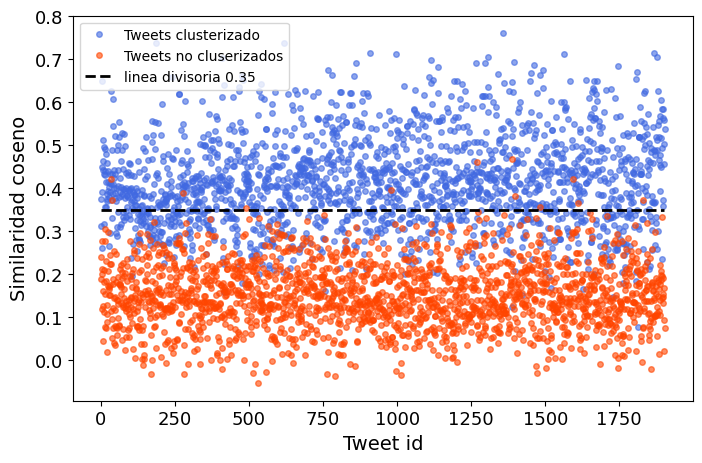

In [35]:
plt.figure(figsize=((8,5)))
#plt.title(f'Similaridad entre la frase y Tweets enteros \n "{frase}" ')
plt.plot(macri_clus.index, sim, 'o', label = 'Tweets clusterizado', alpha = 0.6, color = 'royalblue', markersize = 4)
plt.plot(macri_clus.index, sim_flase, 'o', label = 'Tweets no cluserizados', alpha = 0.6, color = 'orangered', markersize =4)
plt.hlines(0.35, 0, 1900, color = 'k', linestyles='dashed', label = 'linea divisoria 0.35', linewidth = 2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Tweet id', fontsize = 14)
plt.ylabel('Similaridad coseno', fontsize = 14)
plt.legend()
plt.savefig('d:/Facultad/Tesis/Escritura/Macri_sep.pdf')
plt.show()

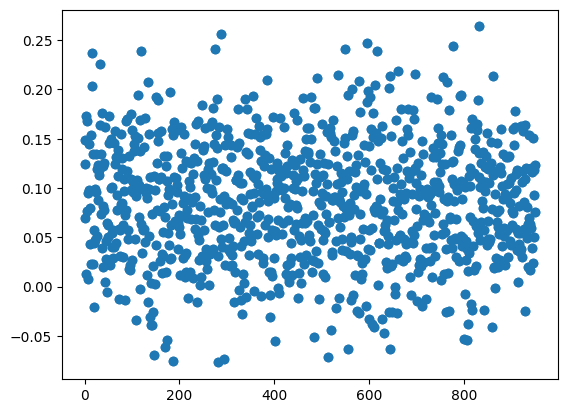

In [34]:
macri_clus['Tweets'][5]

'Macri esta desquiciado gritando "no se inunda mas". Bue.'